In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_full = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv',index_col='PassengerId')
X_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv',index_col='PassengerId')
X_full.head(50)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True


In [3]:
X_full.shape

(8693, 13)

In [4]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [5]:
X_full['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [6]:
X_full['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [7]:
X_full['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [8]:
X_full['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:>

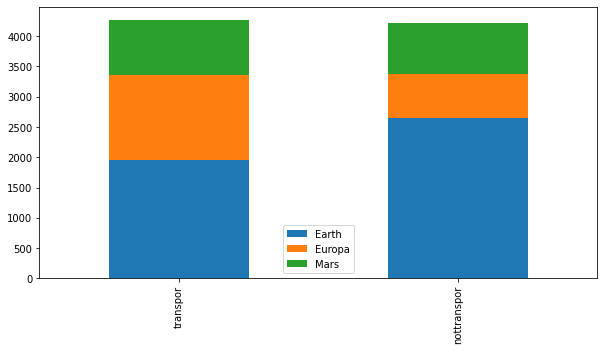

In [9]:
transported = X_full[X_full['Transported']==True]['HomePlanet'].value_counts()
nottransported = X_full[X_full['Transported']==False]['HomePlanet'].value_counts()
df = pd.DataFrame([transported,nottransported])
df.index=['transpor','nottranspor']
df.plot(kind='bar',stacked=True,figsize=(10,5))

<AxesSubplot:>

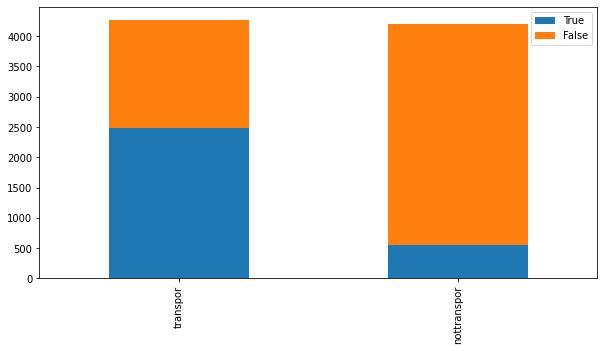

In [10]:
transported = X_full[X_full['Transported']==True]['CryoSleep'].value_counts()
nottransported = X_full[X_full['Transported']==False]['CryoSleep'].value_counts()
df = pd.DataFrame([transported,nottransported])
df.index=['transpor','nottranspor']
df.plot(kind='bar',stacked=True,figsize=(10,5))

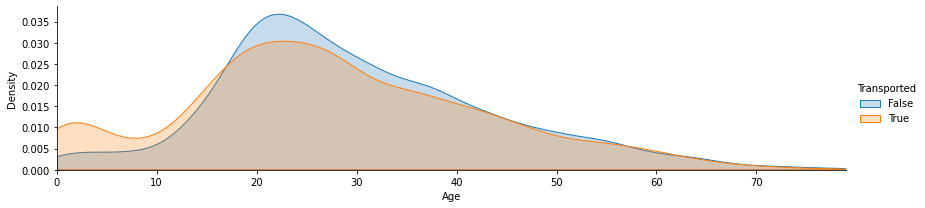

In [11]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,X_full['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 2000.0)

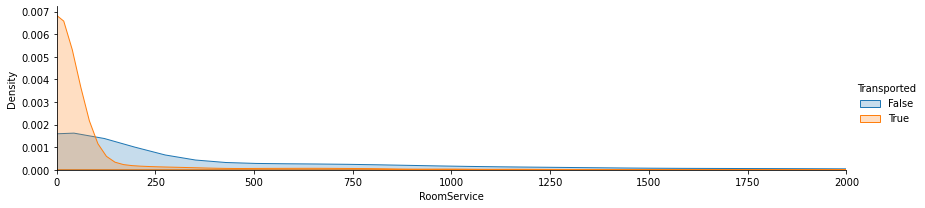

In [12]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'RoomService',shade=True)
facet.set(xlim = (0,X_full['RoomService'].max()))
facet.add_legend()
plt.xlim(0, 2000)

(0.0, 2000.0)

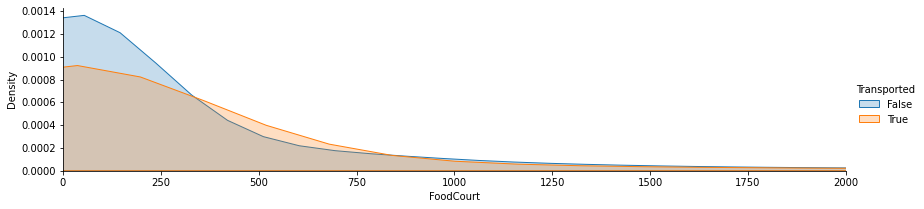

In [13]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'FoodCourt',shade=True)
facet.set(xlim = (0,X_full['FoodCourt'].max()))
facet.add_legend()
plt.xlim(0, 2000)

(0.0, 2000.0)

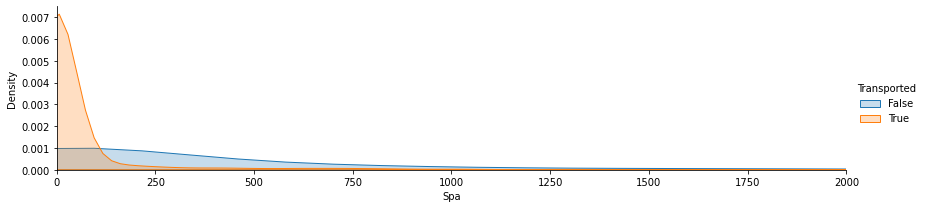

In [14]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'Spa',shade=True)
facet.set(xlim = (0,X_full['Spa'].max()))
facet.add_legend()
plt.xlim(0,2000)


In [15]:
train_test_data =[X_full,X_test]

In [16]:
for dataset in train_test_data :
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')

In [17]:
HomePlanet_mapping = {'Earth':0,'Europa':1,'Mars':2}
for dataset in train_test_data :
    dataset['HomePlanet'] = dataset['HomePlanet'].map(HomePlanet_mapping)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
for dataset in train_test_data :
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna('False')
X_full.CryoSleep = X_full.CryoSleep.replace({True: 1, False: 0})
X_test.CryoSleep = X_test.CryoSleep.replace({True: 1, False: 0})
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [20]:
for dataset in train_test_data :
    dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
Destination_mapping = {'TRAPPIST-1e':0,'55 Cancri e':1,'PSO J318.5-22':2}
for dataset in train_test_data :
    dataset['Destination'] = dataset['Destination'].map(Destination_mapping)
X_full.head(100)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,0,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,0,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,0,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,0,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,0,0,F/24/S,0,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
0103_02,0,1,G/18/S,1,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
0103_03,0,1,G/18/S,0,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False


In [21]:
X_full['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [22]:
for dataset in train_test_data :
    dataset['VIP'] = dataset['VIP'].fillna('False')

In [23]:
for dataset in train_test_data :
    dataset['VIP'] = dataset['VIP'].fillna('False')
X_full.VIP = X_full.VIP.replace({True: 1, False: 0})
X_test.VIP = X_test.VIP.replace({True: 1, False: 0})
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [24]:
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Cabin           100
Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [25]:
for dataset in train_test_data :
    dataset['Cabin']= dataset['Cabin'].str.extract(r'([PS])',expand=False)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,0,S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,0,S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,0,S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,0,S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [26]:
X_full['Cabin'].value_counts()

S    4288
P    4206
Name: Cabin, dtype: int64

In [27]:
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].fillna('S')
Cabin_mapping = {'S':1,'P':0}
for dataset in train_test_data :
    dataset['Cabin'] = dataset['Cabin'].map(Cabin_mapping)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0,0,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,1,0,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,1,0,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0,0,1,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
median = X_full['Age'].median()
print(median)
X_full["Age"].fillna(X_full["Age"].median(), inplace=True)
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

27.0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [29]:
X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [30]:
r = [-1,10,22,36,62,100000]
g = ['0','1','2','3','4']
X_full['AgeCtg'] = pd.cut(X_full['Age'], bins = r, labels = g)
X_test['AgeCtg'] = pd.cut(X_test['Age'], bins = r, labels = g)
X_full.drop('Age',axis=1,inplace=True)
X_test.drop('Age',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,3
0002_01,0,0,1,0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
0003_01,1,0,1,0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
0003_02,1,0,1,0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
0004_01,0,0,1,0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [31]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [32]:
X_test["RoomService"].fillna(X_test["RoomService"].median(), inplace=True)

In [33]:
X_full["RoomService"].fillna(X_full["RoomService"].median(), inplace=True)

In [34]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [35]:
r = [-2,200,750,100000]
g = ['0','1','2']
X_full['RoomServiceCtg'] = pd.cut(X_full['RoomService'], bins = r, labels = g)
X_test['RoomServiceCtg'] = pd.cut(X_test['RoomService'], bins = r, labels = g)
X_full.drop('RoomService',axis=1,inplace=True)
X_test.drop('RoomService',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeCtg,RoomServiceCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,3,0
0002_01,0,0,1,0,0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,0
0003_01,1,0,1,0,1,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,0
0003_02,1,0,1,0,0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0
0004_01,0,0,1,0,0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [36]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [37]:
X_test["FoodCourt"].fillna(X_test["FoodCourt"].median(), inplace=True)

In [38]:
X_full["FoodCourt"].fillna(X_full["FoodCourt"].median(), inplace=True)

In [39]:
r = [-1,200,700,1200,100000]
g = ['0','1','2','3']
X_full['FoodCourtCtg'] = pd.cut(X_full['FoodCourt'], bins = r, labels = g)
X_test['FoodCourtCtg'] = pd.cut(X_test['FoodCourt'], bins = r, labels = g)
X_full.drop('FoodCourt',axis=1,inplace=True)
X_test.drop('FoodCourt',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,ShoppingMall,Spa,VRDeck,Name,Transported,AgeCtg,RoomServiceCtg,FoodCourtCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,0.0,0.0,0.0,Maham Ofracculy,False,3,0,0
0002_01,0,0,1,0,0,25.0,549.0,44.0,Juanna Vines,True,2,0,0
0003_01,1,0,1,0,1,0.0,6715.0,49.0,Altark Susent,False,3,0,3
0003_02,1,0,1,0,0,371.0,3329.0,193.0,Solam Susent,False,2,0,3
0004_01,0,0,1,0,0,151.0,565.0,2.0,Willy Santantines,True,1,1,0


In [40]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [41]:
X_test["Spa"].fillna(X_test["Spa"].median(), inplace=True)

In [42]:
X_full["Spa"].fillna(X_full["Spa"].median(), inplace=True)

In [43]:
r = [-1,125,300,100000]
g = ['0','1','2']
X_full['SpaCtg'] = pd.cut(X_full['Spa'], bins = r, labels = g)
X_test['SpaCtg'] = pd.cut(X_test['Spa'], bins = r, labels = g)
X_full.drop('Spa',axis=1,inplace=True)
X_test.drop('Spa',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,ShoppingMall,VRDeck,Name,Transported,AgeCtg,RoomServiceCtg,FoodCourtCtg,SpaCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,0.0,0.0,Maham Ofracculy,False,3,0,0,0
0002_01,0,0,1,0,0,25.0,44.0,Juanna Vines,True,2,0,0,2
0003_01,1,0,1,0,1,0.0,49.0,Altark Susent,False,3,0,3,2
0003_02,1,0,1,0,0,371.0,193.0,Solam Susent,False,2,0,3,2
0004_01,0,0,1,0,0,151.0,2.0,Willy Santantines,True,1,1,0,2


In [44]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

ShoppingMall    208
VRDeck          188
Name            200
dtype: int64


(0.0, 2000.0)

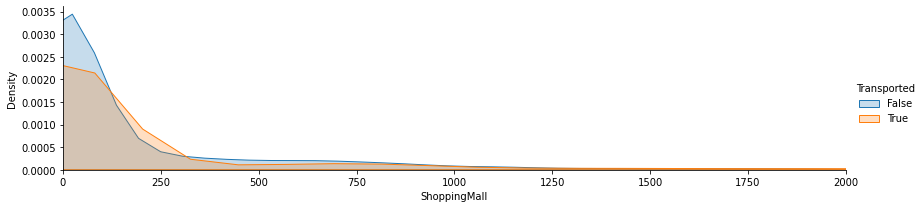

In [45]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'ShoppingMall',shade=True)
facet.set(xlim = (0,X_full['ShoppingMall'].max()))
facet.add_legend()
plt.xlim(0,2000)

In [46]:
X_test["ShoppingMall"].fillna(X_test["ShoppingMall"].median(), inplace=True)

In [47]:
X_full["ShoppingMall"].fillna(X_full["ShoppingMall"].median(), inplace=True)

In [48]:
r = [-1,100,200,300,450,500,100000]
g = ['0','1','2','3','4','5']
X_full['ShoppingMallCtg'] = pd.cut(X_full['ShoppingMall'], bins = r, labels = g)
X_test['ShoppingMallCtg'] = pd.cut(X_test['ShoppingMall'], bins = r, labels = g)
X_full.drop('ShoppingMall',axis=1,inplace=True)
X_test.drop('ShoppingMall',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,VRDeck,Name,Transported,AgeCtg,RoomServiceCtg,FoodCourtCtg,SpaCtg,ShoppingMallCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,0.0,Maham Ofracculy,False,3,0,0,0,0
0002_01,0,0,1,0,0,44.0,Juanna Vines,True,2,0,0,2,0
0003_01,1,0,1,0,1,49.0,Altark Susent,False,3,0,3,2,0
0003_02,1,0,1,0,0,193.0,Solam Susent,False,2,0,3,2,3
0004_01,0,0,1,0,0,2.0,Willy Santantines,True,1,1,0,2,1


In [49]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

VRDeck    188
Name      200
dtype: int64


In [50]:
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

VRDeck    80
Name      94
dtype: int64


(0.0, 2000.0)

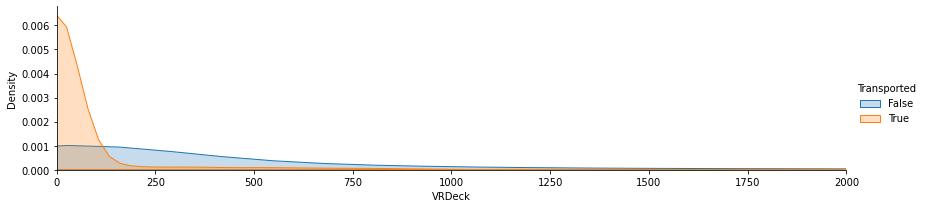

In [51]:
import seaborn as sns
facet = sns.FacetGrid(X_full,hue="Transported",aspect=4)
facet.map(sns.kdeplot,'VRDeck',shade=True)
facet.set(xlim = (0,X_full['VRDeck'].max()))
facet.add_legend()
plt.xlim(0,2000)

In [52]:
X_test["VRDeck"].fillna(X_test["VRDeck"].median(), inplace=True)

In [53]:
X_full["VRDeck"].fillna(X_full["VRDeck"].median(), inplace=True)

In [54]:
r = [-1,120,500,100000]
g = ['0','1','2']
X_full['VRDeckCtg'] = pd.cut(X_full['VRDeck'], bins = r, labels = g)
X_test['VRDeckCtg'] = pd.cut(X_test['VRDeck'], bins = r, labels = g)
X_full.drop('VRDeck',axis=1,inplace=True)
X_test.drop('VRDeck',axis=1,inplace=True)
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,AgeCtg,RoomServiceCtg,FoodCourtCtg,SpaCtg,ShoppingMallCtg,VRDeckCtg
PassengerId,,,,,,,,,,,,,
0001_01,1,0,0,0,0,Maham Ofracculy,False,3,0,0,0,0,0
0002_01,0,0,1,0,0,Juanna Vines,True,2,0,0,2,0,0
0003_01,1,0,1,0,1,Altark Susent,False,3,0,3,2,0,0
0003_02,1,0,1,0,0,Solam Susent,False,2,0,3,2,3,1
0004_01,0,0,1,0,0,Willy Santantines,True,1,1,0,2,1,0


In [55]:
missing_val_count_by_column = (X_full.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Name    200
dtype: int64


In [56]:
missing_val_count_by_column = (X_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Name    94
dtype: int64


In [57]:
X_full.drop('Name',axis=1,inplace=True)
X_test.drop('Name',axis=1,inplace=True)

In [58]:
print(X_full['Transported'])

PassengerId
0001_01    False
0002_01     True
0003_01    False
0003_02    False
0004_01     True
           ...  
9276_01    False
9278_01    False
9279_01     True
9280_01    False
9280_02     True
Name: Transported, Length: 8693, dtype: bool


In [59]:
X_full.Transported = X_full.Transported.replace({True: 1, False: 0})
X_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported,AgeCtg,RoomServiceCtg,FoodCourtCtg,SpaCtg,ShoppingMallCtg,VRDeckCtg
PassengerId,,,,,,,,,,,,
0001_01,1,0,0,0,0,0,3,0,0,0,0,0
0002_01,0,0,1,0,0,1,2,0,0,2,0,0
0003_01,1,0,1,0,1,0,3,0,3,2,0,0
0003_02,1,0,1,0,0,0,2,0,3,2,3,1
0004_01,0,0,1,0,0,1,1,1,0,2,1,0


In [60]:
target = X_full.Transported

In [61]:
X_full.drop('Transported',axis=1,inplace=True)
X_full.drop('CryoSleep',axis=1,inplace=True)
X_test.drop('CryoSleep',axis=1,inplace=True)
X_full.drop('VIP',axis=1,inplace=True)
X_test.drop('VIP',axis=1,inplace=True)

In [62]:
X_test.head()

,HomePlanet,Cabin,Destination,AgeCtg,RoomServiceCtg,FoodCourtCtg,SpaCtg,ShoppingMallCtg,VRDeckCtg
PassengerId,,,,,,,,,
0013_01,0,1,0,2,0,0,0,0,0
0018_01,0,1,0,1,0,0,2,0,0
0019_01,1,1,1,2,0,0,0,0,0
0021_01,1,1,0,3,0,3,1,0,2
0023_01,0,1,0,1,0,0,0,5,0


In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
clf.fit(X_full, target)
prediction = clf.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": X_test.index,
        "Transported": prediction
    })
submission.Transported = submission.Transported.replace({1: True, 0: False})
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
